# OSM data analysis of Tour operator data in Kathmandu

This python notebook analyses tour operator data within Kathmandu. First, OSM data within a given geojson bounds is extracted using the `osmnx` package. After this, by making requests to the Overpass API, we look at the latest date at which each entity is modified. Finally, after joining these two datasets, we generate summary statisics and time series plots to understand attribute coverage and data recency.

In [12]:
import os
import numpy as np
import requests
import geopandas as gpd
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap


boundary_file = "kathmandu.geojson"
tags = {"shop": "travel_agency"}
filename = "tour_operators"
completeness_tags = ["name", "opening_hours", "phone","email"]

In [13]:
kathmandu_valley = gpd.read_file(boundary_file)

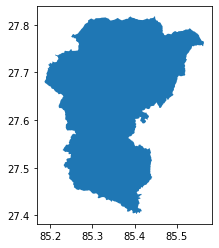

In [14]:
# create the plot
kathmandu_valley.plot()
north=kathmandu_valley.bounds['maxy'].values.item()
south=kathmandu_valley.bounds['miny'].values.item()
east=kathmandu_valley.bounds['maxx'].values.item()
west=kathmandu_valley.bounds['minx'].values.item()

In [15]:
osm_data=ox.geometries_from_bbox(north, south, east, west,tags)
timestamp = pd.DataFrame({'unique_id': [], 'timestamp': []})

entitylist = osm_data['unique_id'].to_list()
for entity in entitylist:
    index = entitylist.index(entity)
    overpass_url = "http://overpass-api.de/api/interpreter"
    feat_type = entity.split("/")[0]
    feat_id = entity.split("/")[1]
    query = f'[out:json][timeout:25];({feat_type}({feat_id}););out meta;'
    r = requests.get(overpass_url, params={'data': query})
    try:
        element = r.json()['elements'][0]
        timestamp = timestamp.append({'unique_id': entity, 'timestamp': element['timestamp']}, ignore_index=True)
        print(str(index) +" __ "+ str(entity) +" __ "+ element['timestamp'])
    except:
        print("Exception: " + str(entity))
        
del(osm_data["geometry"])
final = pd.merge(osm_data, timestamp, how='inner', on='unique_id')        
# final.to_csv(path_or_buf=filename, sep=",", index=False)

/home/arogya/projects/c2m2/osm_analysis/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0 __ node/1349680759 __ 2011-07-04T21:47:02Z
1 __ node/1845559149 __ 2018-12-06T09:12:00Z
2 __ node/1898414113 __ 2012-09-04T14:53:56Z
3 __ node/1898414116 __ 2012-09-04T14:53:56Z
4 __ node/1898463260 __ 2013-01-09T06:39:35Z
5 __ node/1898513862 __ 2019-03-19T08:28:18Z
6 __ node/1898572363 __ 2015-07-17T06:41:59Z
7 __ node/1898593307 __ 2015-07-17T06:42:11Z
8 __ node/1904215985 __ 2012-09-07T13:33:33Z
9 __ node/1905155323 __ 2015-07-17T06:44:25Z
10 __ node/1907896202 __ 2012-09-10T05:21:42Z
11 __ node/1936281018 __ 2012-09-28T06:16:44Z
12 __ node/1956979191 __ 2018-12-09T11:36:09Z
13 __ node/1956979193 __ 2012-10-10T18:18:44Z
14 __ node/1956979194 __ 2012-10-10T18:18:44Z
15 __ node/1957113649 __ 2012-10-10T18:01:00Z
16 __ node/1957113650 __ 2012-10-10T18:01:00Z
17 __ node/1957113651 __ 2012-10-10T18:01:00Z
18 __ node/1957113654 __ 2012-10-10T18:01:00Z
19 __ node/1957113656 __ 2012-10-10T18:01:00Z
20 __ node/1957113658 __ 2012-10-10T18:01:00Z
21 __ node/1957113663 __ 2015-02-10T10:51:47

177 __ node/3506712476 __ 2015-05-09T10:37:35Z
178 __ node/3506712477 __ 2015-05-09T10:37:35Z
179 __ node/3506712485 __ 2015-05-09T10:37:35Z
180 __ node/3506878010 __ 2015-05-09T13:06:56Z
181 __ node/3506878012 __ 2015-05-09T13:06:57Z
182 __ node/3506878015 __ 2015-05-09T13:06:57Z
183 __ node/3506878017 __ 2015-05-09T13:06:57Z
184 __ node/3506878019 __ 2015-05-09T13:06:57Z
185 __ node/3506878021 __ 2015-05-09T13:06:57Z
186 __ node/3506878023 __ 2015-05-09T13:06:57Z
187 __ node/3506878026 __ 2015-05-09T13:06:57Z
188 __ node/3508175143 __ 2015-05-10T08:31:17Z
189 __ node/3508175153 __ 2015-05-10T08:31:17Z
190 __ node/3508175162 __ 2015-05-10T08:31:17Z
191 __ node/3509030391 __ 2020-05-11T11:16:53Z
192 __ node/3509034494 __ 2015-05-10T19:44:35Z
193 __ node/3509034496 __ 2020-05-11T12:46:34Z
194 __ node/3722588409 __ 2017-12-15T17:21:28Z
195 __ node/3766701678 __ 2018-09-13T05:58:52Z
196 __ node/3773248778 __ 2015-10-05T13:32:27Z
197 __ node/3906279573 __ 2015-12-23T11:35:30Z
198 __ node/4

352 __ node/6477686585 __ 2019-05-16T10:47:56Z
353 __ node/6508642985 __ 2019-05-29T11:26:31Z
354 __ node/6551304986 __ 2019-06-26T04:47:01Z
355 __ node/6665033885 __ 2019-08-02T11:05:45Z
356 __ node/6810640185 __ 2019-09-20T04:33:35Z
357 __ node/6855686085 __ 2019-10-06T16:50:17Z
358 __ node/6934746485 __ 2019-10-31T12:03:10Z
359 __ node/6938714185 __ 2019-11-05T22:14:39Z
360 __ node/6947280785 __ 2019-11-05T05:40:20Z
361 __ node/6959713187 __ 2019-11-15T14:03:51Z
362 __ node/6965495486 __ 2019-11-11T05:22:50Z
363 __ node/7013495985 __ 2019-11-27T09:08:01Z
364 __ node/7045755190 __ 2019-12-27T21:34:49Z
365 __ node/7106561952 __ 2020-03-14T06:59:44Z
366 __ node/7123653385 __ 2020-01-11T02:56:20Z
367 __ node/7145132772 __ 2020-05-11T18:50:31Z
368 __ node/7209801686 __ 2020-02-14T03:11:16Z
369 __ node/7213404041 __ 2020-02-15T06:47:00Z
370 __ node/7674777085 __ 2020-07-12T07:25:10Z
371 __ node/7675662686 __ 2020-07-12T07:25:15Z
372 __ node/7946059785 __ 2020-10-03T13:18:55Z
373 __ node/8

## Tag completeness

In this section, the entire OSM dataset is checked for completeness based on availability of the following standard tags (key value pairs) for hotels. In addition, a completeness score is also assigned for each individual entity based on the availaibility of the following tags.   

| Information    | Key           | Value              |
|----------------|---------------|--------------------|
| Infrastructure |    shop       |    travel_agency   |
| Name           |      name     | Name of restaurant |
| Opening hours  | opening_hours |  Mo-Fr 10:00-17:00 |
| Phone          |     phone     |       Ph no.       |
| email          |     email     |    email address   |

In [16]:
completeness = pd.DataFrame({'tag': [], 'completeness_percentage': []})

total_entries = len(final)
for tag in completeness_tags:
    if tag in final.columns:
        nulls = final[tag].isna().sum()  
        completeness = completeness.append({'tag': tag,'completeness_percentage': ((total_entries - nulls)/total_entries)*100}, ignore_index=True)
    else:
        completeness = completeness.append({'tag': tag,'completeness_percentage': 0.0 }, ignore_index=True)
        

/home/arogya/projects/c2m2/osm_analysis/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<BarContainer object of 4 artists>

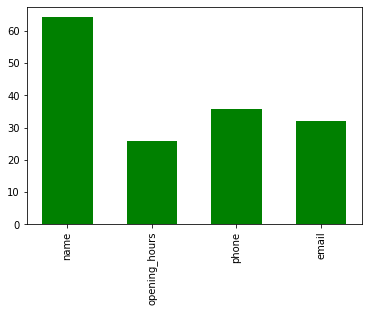

In [17]:
import matplotlib.pyplot as plt 
x = completeness.tag
y = completeness.completeness_percentage

plt.xticks(rotation=90) 
plt.bar(x, y, tick_label = x, 
        width = 0.6, color = [ 'green'])

In [18]:
completeness_scores =  pd.DataFrame({'unique_id': [], 'completeness_score': []})
for index, row in final.iterrows():
    total_tags = len(completeness_tags)
    count = 0
    
    for tag in completeness_tags:
        if tag in final.columns:
            if row[tag] is None:
                count = count
            else:
                count = count + 1
    completeness_scores = completeness_scores.append({'unique_id': row.unique_id, 'completeness_score': count/total_tags}, ignore_index=True)

final = pd.merge(final, completeness_scores, how='inner', on='unique_id')        
final.to_csv(path_or_buf=filename+".csv", sep=",", index=False)
completeness.to_csv(path_or_buf=filename+"_completeness.csv", sep=",", index=False)

## Data recency

In this section, the entire OSM dataset is checked for recency.

<BarContainer object of 67 artists>

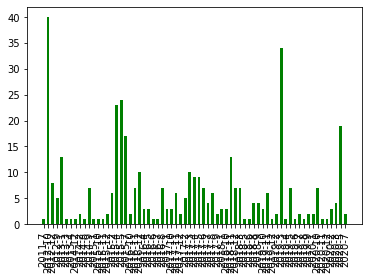

In [19]:
final.timestamp = pd.to_datetime(final.timestamp)
final['YearMonth'] =final['timestamp'].apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
# final.groupby('YearMonth')
counts = final.value_counts(subset=['YearMonth']).rename_axis('unique_values').reset_index(name='counts')
counts = counts.sort_values(by="unique_values")
counts.to_csv(path_or_buf=filename+"_counts.csv", sep=",", index=False)

x = counts.unique_values
y = counts.counts

plt.xticks(rotation=90) 
plt.bar(x, y, tick_label = x, 
        width = 0.6, color = [ 'green'])

<BarContainer object of 10 artists>

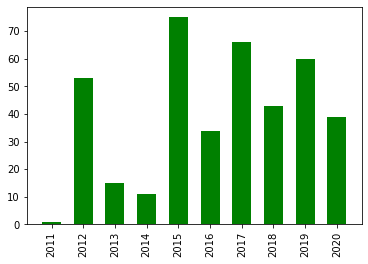

In [20]:
final.timestamp = pd.to_datetime(final.timestamp)
final['Year'] = final['timestamp'].apply(lambda x: '{year}'.format(year=x.year))
# final.groupby('YearMonth')

year_counts = final.value_counts(subset=['Year']).rename_axis('unique_values').reset_index(name='counts')
year_counts = year_counts.sort_values(by="unique_values")


x = year_counts.unique_values
y = year_counts.counts


plt.xticks(rotation=90) 
plt.bar(x, y, tick_label = x, 
        width = 0.6, color = [ 'green'])